# Running Inference using the trained model

Let’s run inferences on images 

# Access to Google drive folder

Allow access to our drive

In [1]:
# Drive in notebook
from google.colab import drive
drive.mount('/content/drive', force_remount=True) # Mount the folder we want to access

Mounted at /content/drive


## Load libraries

In [41]:
import torch
import os 
import sys
from IPython.display import Image  # for displaying images

import json

print(f"Python version: {sys.version}, {sys.version_info} ")
print(f"Pytorch version: {torch.__version__} ")

Python version: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0], sys.version_info(major=3, minor=10, micro=11, releaselevel='final', serial=0) 
Pytorch version: 2.0.0+cu118 


In [3]:
!pwd

/content


In [4]:
%cd /content/drive/MyDrive/Portafolio/ComputerVision/Object_Detection/Waste_in_the wild/yolov7
!pwd
!ls

/content/drive/MyDrive/Portafolio/ComputerVision/Object_Detection/Waste_in_the wild/yolov7
/content/drive/MyDrive/Portafolio/ComputerVision/Object_Detection/Waste_in_the wild/yolov7
cfg	   figure      paper		 scripts	  train.py
data	   hubconf.py  __pycache__	 test.py	  utils
deploy	   inference   README.md	 tools		  yolov7.pt
detect.py  LICENSE.md  requirements.txt  traced_model.pt
export.py  models      runs		 train_aux.py


## A single image

In [8]:
# --source inference/images/waste.jpg  ->  source of data
# --weights runs/train/yolov7-custom/weights/best.pt  ->  our model
# --conf 0.25  ->  we use a confidentiality of 0.25 -> the model will only assume that it has detected an object when it's 25% sure that what it's seeing is some kind of waste
!python detect.py --weights runs/train/yolov7-custom/weights/best.pt --conf 0.25 --img-size 640 --source inference/images/waste.jpg

Namespace(weights=['runs/train/yolov7-custom/weights/best.pt'], source='inference/images/waste.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 2023-4-24 torch 2.0.0+cu118 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36800018 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
8 Clear plastic bottles, 1 Plastic 

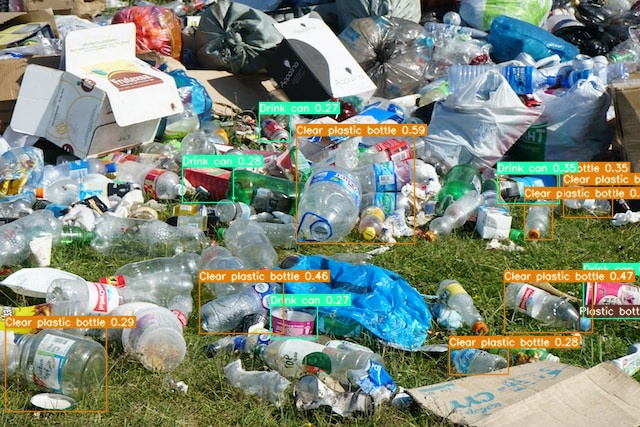

In [25]:
Image('runs/detect/exp2/waste.jpg')

## A folder of images

Collect images and detect all the images into folder **inference/images/collect_images**


In [11]:
# --source inference/images/collect_images  ->  source of data
# --weights runs/train/yolov7-custom/weights/best.pt  ->  our model
# --conf 0.25  ->  we use a confidentiality of 0.25 -> the model will only assume that it has detected an object when it's 25% sure that what it's seeing is some kind of waste

!python detect.py --weights runs/train/yolov7-custom/weights/best.pt --conf 0.25 --img-size 640 --source inference/images/collect_images

Namespace(weights=['runs/train/yolov7-custom/weights/best.pt'], source='inference/images/collect_images', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 2023-4-24 torch 2.0.0+cu118 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36800018 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 Other plastic wrapper, Done.

Visualize our predictions

In [35]:
from PIL import Image

detections_dir = "runs/detect/exp/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

# creating a object
for img_path in detection_images:
    im = Image.open(img_path)
    im2 = im.resize((800, 800))
    im2.show()


Output hidden; open in https://colab.research.google.com to view.

## Process video

In [ ]:
# --source inference/images/collect_images  ->  source of data
# --weights runs/train/yolov7-custom/weights/best.pt  ->  our model
# --conf 0.25  ->  we use a confidentiality of 0.25 -> the model will only assume that it has detected an object when it's 25% sure that what it's seeing is some kind of waste

!python detect.py --weights runs/train/yolov7-custom/weights/best.pt --conf 0.25 --img-size 640 --source inference/images/waste_in_the_wild.mp4